## 0. an end to end sklearn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# create X (features matrix)
x = heart_disease.drop("target", axis = 1)

# create Y (labels)
y = heart_disease["target"]

In [3]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()         #  classifier or model
# clf = RandomForestClassifier(n_estimators = 100)
# we will keep the default hyperparameters
clf.get_params()   # show the default hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#3 . Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# 20% data will be used for testing and 80% data will be used for training

In [5]:
clf.fit(x_train, y_train)    # find the patterns in the traing data

RandomForestClassifier()

In [6]:
import numpy as np
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))     # the array needs the same number of features as training data

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [8]:
y_test

258    0
215    0
51     1
290    0
117    1
      ..
244    0
265    0
239    0
192    0
7      1
Name: target, Length: 61, dtype: int64

In [9]:
#4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [10]:
clf.score(x_test,y_test)

0.7540983606557377

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))  # compare the test model with the prediction model

              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [12]:
confusion_matrix(y_test,y_preds)

array([[21,  7],
       [ 8, 25]], dtype=int64)

In [13]:
accuracy_score(y_test,y_preds)

0.7540983606557377

In [14]:
# 5 . Improve a model
# try different amount of n_estimators

np.random.seed(4)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators .. ')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'Model accuracy on test set: {clf.score(x_test,y_test) * 100}')
    print('')

Trying model with 10 estimators .. 
Model accuracy on test set: 72.1311475409836

Trying model with 20 estimators .. 
Model accuracy on test set: 75.40983606557377

Trying model with 30 estimators .. 
Model accuracy on test set: 81.9672131147541

Trying model with 40 estimators .. 
Model accuracy on test set: 81.9672131147541

Trying model with 50 estimators .. 
Model accuracy on test set: 72.1311475409836

Trying model with 60 estimators .. 
Model accuracy on test set: 80.32786885245902

Trying model with 70 estimators .. 
Model accuracy on test set: 80.32786885245902

Trying model with 80 estimators .. 
Model accuracy on test set: 77.04918032786885

Trying model with 90 estimators .. 
Model accuracy on test set: 80.32786885245902



In [15]:
#6. save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.8032786885245902

In [17]:
# to ignore the warnings, type this code:
import warnings
warnings.filterwarnings("ignore")

## 1. Getting our data ready to be used with ML

Three main things we have to do-
1. Split the data into features and labels (usualyy 'x' and 'y')
2. Filling (also called imputing) or disregarding misiing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [18]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
x =heart_disease.drop('target', axis=1)   # x will have all columns except target column
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 make sure its numerical

In [23]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [24]:
len(car_sales)

1000

In [25]:

car_sales.dtypes


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
#split into x,y
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [28]:
# build the ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)
# error occurs because the computer cannot identify the non numerical values like color etc.

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]   # columns to be transformed into numerical values
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)   
transformed_x

In [30]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
# in pandas also we can transform data into numerical form using dummies()
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
# lets refit the model
np.random.seed(3)

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model.fit(x_train, y_train)


RandomForestRegressor()

In [33]:
model.score(x_test, y_test)

0.1870531368170122

In [34]:
sklearn.__version__

NameError: name 'sklearn' is not defined

## 1.2 What if there were missing values?
1. Fill them with some value(a.k.a. imputation)
2. Remove the samples with missing data altogether

In [35]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [36]:
car_sales_missing.isna().sum()   # gives total no of missing data in the dataframe

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# create x and y
x = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"]

In [34]:
# lets try and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]   # columns to be transformed into numerical values
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)   
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### option 1 : fill missing datas with pandas

In [35]:
# fill the make column
car_sales_missing["Make"].fillna("missing", inplace=True)

#fill the colour column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill the doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [36]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
# remove rows with missing "Price" value
car_sales_missing.dropna(inplace=True)

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
len(car_sales_missing) # we have lost 50 samples of adata which doesnt have price value

950

In [40]:
# create x and y
x = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"]

In [41]:
# lets try and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]   # columns to be transformed into numerical values
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)   
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 : Fill missing values with scikit learn

In [43]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# drop the rows with no labels\ Targets
car_sales_missing.dropna(subset = ["Price"], inplace =True)   #drop those rows having Price values as NaN
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
# split into x y
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [51]:
# fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with "mean"
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [52]:
# we will create a dataframe for the filled values 
car_sales_filled = pd.DataFrame(filled_x,
                               columns = ["Make","Colour","Doors","Odometer (KM)"])

car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [53]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
# lets try and convert our data to numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]   # columns to be transformed into numerical values
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)   
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [71]:
# now we have got our data as numbers and filled (no missing data)
# lets fit a model
np.random.seed(3)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

#it will perform worse becoz it has 50 less samples than the previous one

0.021465517391303757

In [58]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator / algorithm for our problem
sklearn uses estimator as another term for ML model or algorithm

* classification - predicting whether a sample is one thing or the other
* regression - predicting a number

Step 1: Check the sklearn ML Map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a ML model for a regression problem

In [38]:
# import boston housing dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [39]:
# we will now get this dataset into a pandas dataframe 
boston_df = pd.DataFrame(boston["data"], columns= boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
# how many samples?
len(boston_df)

506

In [41]:
boston_df["target"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [42]:
# lets try the ridge regression model 
# consider the sckit learn workflow from google
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(77)

# create the data 
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# check the score of the Ridge model on the test data
model.score(x_test, y_test)

0.7306005477249633

How do we improve this score?

what if Ridge wasnt working?

lets refer back to the map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [43]:
# lets try the Random Forest regressor
# consider the sckit learn workflow from google
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(77)

# create the data 
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# instantiate Random forest regressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Evaluate the random forest regressor
rf.score(x_test, y_test)

0.9009453327079903

In [44]:
# check the ridge model again...
model.score(x_test, y_test)

0.7306005477249633

### 2.2 choosing an estimator for the classification problem
Refer the map again: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

consulting the map and it says to try `LinearSVC`

In [45]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# import the LinearSVC Estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(8)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# Instantiate LinearSVC
clf =LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8524590163934426

In [47]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [48]:
# lets try with the RandomforestClassifier Estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(8)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# Instantiate LinearSVC
clf =RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8032786885245902

Tidbit:
1. If you have structured data, use ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algo on our data and use it to make predictions 

### 3.1 fitting the model to the data

Different names for:
* `x` = features, features variables, data
* `y` = labels, targets, target variables

In [49]:
# lets try with the RandomforestClassifier Estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(8)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

# Instantiate LinearSVC  (training the ML model)
clf =RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC (use the patterns the model has learned)
clf.score(x_test, y_test)

0.8032786885245902

In [50]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [51]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a ML model
2 ways to make predictions: 
    * `predict()` 
    * `Predict_proba()`

In [33]:
# use a trained model to make predictions
clf.predict(np.array([1,2,5,3,4])) # this doesnt work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 5. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3


In [35]:
clf.predict(x_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [35]:
np.array(y_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [36]:
# compare predictions to truth labels to evaluate the model 
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8032786885245902

In [37]:
clf.score(x_test, y_test)

0.8032786885245902

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8032786885245902

### make predictions with predict_proba()


In [39]:
# predict_proba() returns the probabilities of a classification model
clf.predict_proba(x_test[:5])        # this returns the probabilities of Heart disease(0) and non-heart disease(1) for 5 rows

array([[0.33, 0.67],
       [0.54, 0.46],
       [0.14, 0.86],
       [0.95, 0.05],
       [0.83, 0.17]])

In [40]:
# lets predict() on the same data
clf.predict(x_test[:5])

array([1, 0, 1, 0, 0], dtype=int64)

In [41]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3


predict() can also be used for regression models

In [42]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [43]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(3)

# create the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit model 
model = RandomForestRegressor().fit(x_train, y_train)

# make predictions
y_preds = model.predict(x_test)

In [45]:
y_preds[:10]

array([43.373, 18.261, 21.372, 30.508, 22.483, 21.121, 15.024,  7.491,
       21.262, 17.71 ])

In [47]:
np.array(y_test[:10])   # compare the actual values with the predicted values above

array([44.8, 17.1, 17.8, 33.1, 21.9, 21. , 18.4, 10.4, 23.1, 20. ])

In [48]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

1.969911764705882

## 4. Evaluating a ML model
Three ways to evaluate sklearn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. problem-specific metric functions

In [52]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(3)

# create the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit model 
clf = RandomForestClassifier().fit(x_train, y_train)

In [55]:
clf.score(x_train, y_train)

1.0

In [56]:
clf.score(x_test, y_test)

0.8360655737704918

Lets do the same but for regression

In [57]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(3)

# create the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit model 
model = RandomForestRegressor().fit(x_train, y_train)


In [58]:
model.score(x_test, y_test)   # compare the Docstrings of score() with the above score() used

0.9072857183707557

### 4.2 evaluating a model using the `scoring()` parameter

In [59]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(3)

# create the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit model 
clf = RandomForestClassifier().fit(x_train, y_train)

In [60]:
clf.score(x_test, y_test)

0.8360655737704918

In [62]:
cross_val_score(clf, x, y, cv=5)    # cv stands for cross validation

array([0.83606557, 0.8852459 , 0.81967213, 0.85      , 0.8       ])

In [63]:
np.random.seed(4)

# single training and test split score
clf_single_score = clf.score(x_test, y_test)

# take the mean of 5-fold cross validation score 
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

#compare the 2
clf_single_score, clf_cross_val_score

(0.8360655737704918, 0.8150273224043716)

In [ ]:
# default scoring parameter of classifier = mean accuracy
clf.score()

In [64]:
# scoring parameter is set to null by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.85245902, 0.86885246, 0.85245902, 0.76666667, 0.78333333])

### Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [42]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(3)

# create the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x, y)

In [43]:
np.mean(cross_val_score)

0.8182513661202186

In [44]:
print(f"Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score) * 100}")

Heart disease classifier cross-validated accuracy: 81.82513661202186


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC  curve

ROC curves area comparision of a model's true positive rate (tpr) vs a model's false positive rate(fpr)
* true positive= model predicts 1 when truth is 1
* false positive=model predicts 1 when truth is 0
* true negative=model predicts 0 when truth is 0
* false negative=model predicts 0 when truth is 1

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(x_train, y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.09, 0.91],
       [0.39, 0.61],
       [0.92, 0.08],
       [0.02, 0.98],
       [0.96, 0.04],
       [0.14, 0.86],
       [0.2 , 0.8 ],
       [0.35, 0.65],
       [0.64, 0.36],
       [0.  , 1.  ]])

In [47]:
y_probs_positive = y_probs[:,1]       # collect the data of heart-disease having results = heart disease i.e. '1'
y_probs_positive[:10]

array([0.91, 0.61, 0.08, 0.98, 0.04, 0.86, 0.8 , 0.65, 0.36, 1.  ])

In [48]:
# calculate fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.07692308,
       0.07692308, 0.11538462, 0.15384615, 0.15384615, 0.19230769,
       0.26923077, 0.26923077, 0.26923077, 0.30769231, 0.30769231,
       0.34615385, 0.34615385, 0.38461538, 0.5       , 0.57692308,
       0.57692308, 0.61538462, 0.61538462, 0.65384615, 0.65384615,
       0.69230769, 0.76923077, 0.84615385, 0.92307692, 1.        ])

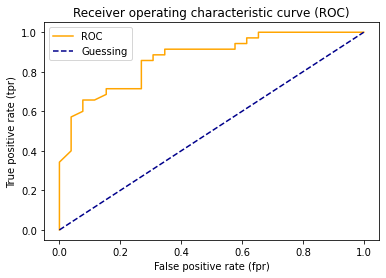

In [49]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    plots a ROC curve given the false positive rate (fpr) and the true positive rate(tpr) of a model.
    '''
    
    # plot roc curve
    plt.plot(fpr, tpr, color ="orange", label ="ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating characteristic curve (ROC)")
    plt.legend()
    plt.show()
    
    
plot_roc_curve(fpr, tpr)

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)  # For the area under the curve

0.868131868131868

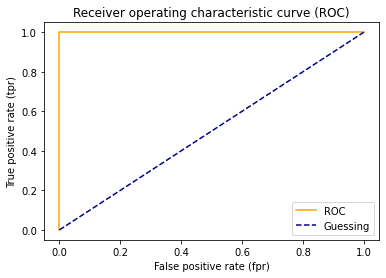

In [51]:
#plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [52]:
# perfetc AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused

In [53]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)     #The diagnol elements are the tpr and tnr and non diagnol elements are fpr and fnr

array([[19,  7],
       [ 6, 29]], dtype=int64)

In [54]:
# visualize confusion matrix with pd.crosstab
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,19,7
1,6,29


In [55]:
19+7+6+29

61

In [56]:
len(x_test)

61

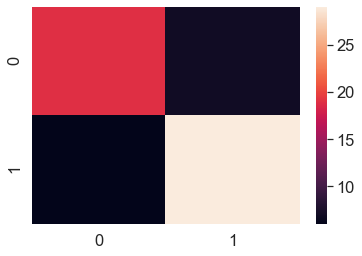

In [57]:
# make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create  a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

We will install seaborn package in here

In [58]:
# how to install a conda package into the current environment from a jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




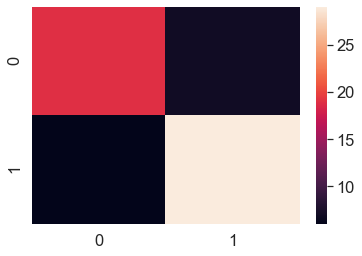

In [59]:
# make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create  a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

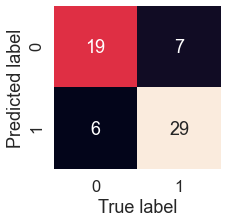

In [60]:
def plot_conf_mat(conf_mat):
    '''
    Plots a confusion matrix using seaborns heatmap()
    '''
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True,   # Annotate the boxes with conf_mat info
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(conf_mat)

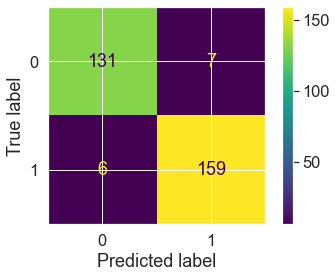

In [62]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x, y)
# this is the sklearn's inbuilt function for plotting the confusion matrix

**Classification report**

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [66]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1  # only one positive case

disease_preds = np.zeros(10000)   # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

# here you can consider other metrics of the model and then decide- is the model really useful?


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics-

    * Accuracy is a good measure to start with if all classes are balanced( eg. same amount of samples which are labelled 0 or 1)
    * Precision and recall become more important when classes are imbalanced
    * If false positive predictions are worse than false negatives, aim for higher precision 
    * If false negative predictions are worse than false positives, aim for higher recall
    * F1-score is a combination of precision and recall

### 4.2.2 Regression evaluation metrics

 Model evaluation metrics documentation https://scikit-learn.org/stable/modules/model_evaluation.html
 
 1. R^2 (r-squared) or coefficient of determination
 2. Mean absolute error (MAE)
 3. Mean squared error (MSE)
 
 **R^2**
 
What R-squared does: compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For eg. if all your model does is predict the mean of the targets, its r^2 value would be 0. And if your model perfectly predict the range of numbers, its r^2 value will be 1

In [73]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(3)

# create the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit model 
model = RandomForestRegressor().fit(x_train, y_train)


In [76]:
model.score(x_test, y_test)

0.9072857183707557

In [77]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [78]:
y_test.mean()

22.865686274509798

In [79]:
r2_score(y_test, y_test_mean)

0.0

**Mean absolute error (MAE)**
MAE is the avr of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model's preds are.

In [80]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

1.969911764705882

In [83]:
df = pd.DataFrame(data = {"actual values": y_test,
                         "predicted values": y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
224,44.8,43.373,-1.427
137,17.1,18.261,1.161
453,17.8,21.372,3.572
303,33.1,30.508,-2.592
254,21.9,22.483,0.583
...,...,...,...
434,11.7,13.499,1.799
294,21.7,21.869,0.169
306,33.4,34.866,1.466
463,20.2,21.829,1.629


**Mean squared error (MSE)**

In [84]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

7.672552107843138

In [85]:
# calculating mse by hand
squared = np.square(df['differences'])
squared.mean()

7.672552107843138

You should try to minimize MSE and MAE to maximize R^2

### 4.2.3. Finally using the scoring parameter

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(8)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf =RandomForestClassifier()

In [13]:
np.random.seed(8)
cv_acc  = cross_val_score(clf, x, y, cv=5, scoring = None)
cv_acc

array([0.83606557, 0.90163934, 0.81967213, 0.8       , 0.76666667])

In [39]:
# cross-validated accuracy
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is : 82.48%


In [40]:
np.random.seed(8)
cv_acc  = cross_val_score(clf, x, y, cv=5, scoring = 'accuracy')
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is : 82.48%


In [41]:
# precision
cv_precision  = cross_val_score(clf, x, y, cv=5, scoring = 'precision')
np.mean(cv_precision)

0.8150273224043716

In [42]:
#recall
cv_recall  = cross_val_score(clf, x, y, cv=5, scoring = 'recall')
np.mean(cv_recall)

0.8214207650273224

In [43]:
# f1
cv_f1  = cross_val_score(clf, x, y, cv=5, scoring = 'f1')
np.mean(cv_f1)

0.8050273224043716

How about the regression model?

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(2)

# Make the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

model =RandomForestRegressor()

In [45]:
# r2
np.random.seed(2)
cv_r2  = cross_val_score(model, x, y, cv=5, scoring = None)
cv_r2

array([0.77337034, 0.85316025, 0.77011563, 0.47600296, 0.32637596])

In [46]:
# r2
np.random.seed(2)
cv_r2  = cross_val_score(model, x, y, cv=5, scoring = 'r2')
cv_r2

array([0.77337034, 0.85316025, 0.77011563, 0.47600296, 0.32637596])

In [47]:
# mean absolute error
cv_mae  = cross_val_score(model, x, y, cv=5, scoring = 'neg_mean_absolute_error')
cv_mae

array([-2.07298039, -2.60946535, -3.37530693, -3.75809901, -3.17619802])

In [48]:
# mean squared error
cv_mse  = cross_val_score(model, x, y, cv=5, scoring = 'neg_mean_squared_error')
cv_mse

array([ -7.7918304 , -14.02439838, -21.19277704, -45.35773245,
       -18.45187833])

In [49]:
np.mean(cv_mse)

-21.363723318015907

### 4.3 Using different evaluation metrics as sklearn functions

**Classification Evaluation Fuctions**

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(8)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf =RandomForestClassifier()
clf.fit(x_train, y_train)

#make some predictions
y_preds = clf.predict(x_test)

# Evaluate the classifier
print("classifier metrics on the test set")
print(f'Accuracy: {accuracy_score(y_test, y_preds)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

classifier metrics on the test set
Accuracy: 0.8032786885245902
Precision: 0.9090909090909091
Recall: 0.7692307692307693
F1: 0.8333333333333333


**Regression Evaluation Functions**

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(8)

# Make the data
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model =RandomForestRegressor()
model.fit(x_train, y_train)

#make some predictions
y_preds = model.predict(x_test)

# Evaluate the classifier
print("Regression metrics on the test set")
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R^2: 0.7728206909124986
MAE: 2.538862745098039
MSE: 16.832646960784313


## 5. Improving a model

First predictions = baseline predictions. First model = baseline model

From a data perspective-
* Could we collect more data? (generally the more data, the better)
* Could we improve our data?


From a model perspective-
* Is there a better model we can use?
* Could we improve the current model?
    
Hyperparameters vs Parameters-
* Parameters = model finds these patterns in data
* Hyperparameters  = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters- 
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [25]:
clf.get_params()      # it shows all the hyperparameters we can use inside the RandomForestClassifier()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand
lets make 3 sets: training, validation and test

In [26]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust-
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [55]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparision on y_true labels vs. y_preds labels on a classification
    '''
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),  # it will round up to 2 decimal places
                   'precision': round(precision, 2),
                  'recall': round(recall, 2),
                  'f1': round(f1, 2)}
    
    print(f'Accuracy : {accuracy * 100:.2f}&')
    print(f'Precision : {precision:.2f}')
    print(f'Recall : {recall:.2f}')
    print(f'F1 score : {f1:.2f}')
    
    return metric_dict

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(8)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Make the data
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))    # 70% of data for training set
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))  #15% of data for validation split
# rest of 15% data for the test split

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#make baseline predictions using the default values of hyperparameters
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy : 88.89&
Precision : 0.88
Recall : 0.91
F1 score : 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [59]:
len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [60]:
np.random.seed(8)

# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=30).fit(x_train, y_train)

# make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy : 86.67&
Precision : 0.84
Recall : 0.91
F1 score : 0.87


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# we will make a dictionary of the hyperparameters from which our model will find the best combination 
grid = {'n_estimators': [10,100,200,500,1000,1200],
       'max_depth': [None, 5,10,20,30],
       'max_features': ['auto','sqrt'],
       'min_samples_split': [2,4,6],
       'min_samples_leaf': [1,2,4]}

np.random.seed(6)

# split into x and y
x = heart_disease_shuffled.drop('target', axis =1)
y = heart_disease_shuffled['target']

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,  # no of models to try
                           cv =5 ,
                           verbose=2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [63]:
rs_clf.best_params_     # it will show the best parameters for the model 

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5}

In [77]:
# make the predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy : 85.25&
Precision : 0.94
Recall : 0.82
F1 score : 0.88


### 5.3 Hyperparameter tuning with GridSearchCV

In [64]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [65]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [73]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(6)

# split into x and y
x = heart_disease_shuffled.drop('target', axis =1)
y = heart_disease_shuffled['target']

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv =5 ,
                           verbose=2)

# # fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [74]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [75]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy : 80.33&
Precision : 0.89
Recall : 0.79
F1 score : 0.84


Lets compare our different models' metrics

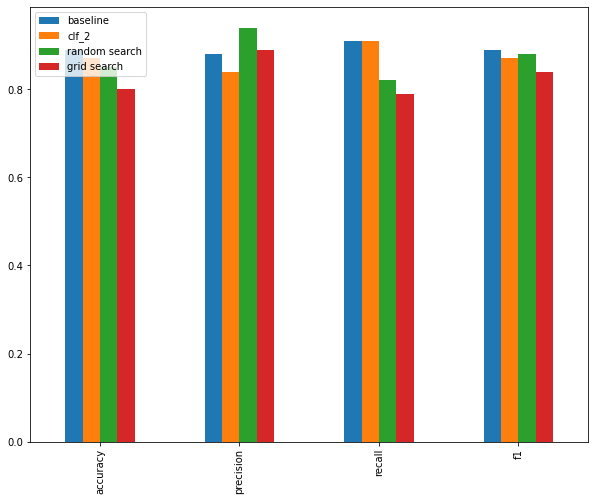

In [78]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})

compare_metrics.plot.bar(figsize = (10,8));

## 6. Saving and loading trained ML models

Teo ways to save and load ML models-
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [79]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))        # 'wb' for write binary

In [80]:
# load a saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))  # 'rb' for read binary

In [81]:
# make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy : 80.33&
Precision : 0.89
Recall : 0.79
F1 score : 0.84


{'accuracy': 0.8, 'precision': 0.89, 'recall': 0.79, 'f1': 0.84}

**Jooblib**

In [82]:
from joblib import dump, load

#save model to file
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [83]:
# import a saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [84]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy : 80.33&
Precision : 0.89
Recall : 0.79
F1 score : 0.84


{'accuracy': 0.8, 'precision': 0.89, 'recall': 0.79, 'f1': 0.84}

## 7. Putting it all together!

In [85]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [86]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [87]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Things to Remember-
* All data should be numeric
* There should be no missing values
* Manipulate the test set the same as the training set
* Never test on data you have trained on
* Tune hyperparameters on validation set OR use cross-validation
* One best performance metric doesnt mean the best model

Steps we want to do-
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [92]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup Random seed
import numpy as np
np.random.seed(8)

# import data and drop rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)                # it will drop those rows in which the 'Price'  value is NaN

# define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps = [
                            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # this will fill the missing values in 'Make' and 'Colour' columns
                            ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

door_feature = ['Doors']
door_transformer = Pipeline(steps= [
                        ('imputer', SimpleImputer(strategy='constant', fill_value=4))           # this will fill the missing values in 'Doors' column with 4
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps= [
                        ('imputer', SimpleImputer(strategy='mean'))
])


# setup preprocessing steps (fill missing values and then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_transformer, categorical_features),
                        ('door', door_transformer, door_feature),
                        ('num', numeric_transformer, numeric_features)
                    ])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps= [
                        ('preprocessor', preprocessor),
                        ('model', RandomForestRegressor())
])

# split data
x = data.drop('Price', axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)


# Fit and score model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.2513022181294806

Its also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [93]:
# using gridsearchcv with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],  # '__' will go 1 level up, and finally pass the values for the strategy as 'mean' or 'median'
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [91]:
gs_model.score(x_test, y_test)

0.3342165177747284